# Titanic Dataset Exploration

In this notebook we will explore Titanic dataset, inorder to complete the Kaggle competion [link](https://www.kaggle.com/c/titanic)

### Goal
Our job is to predict if a passenger survived the sinking of the Titanic or not. For each PassengerId in the test set, we must predict a 0 or 1 value for the Survived variable.

### Metric
The score is the percentage of passengers we correctly predict. This is known simply as "accuracy”.

## Step 1 - Load the data as pandas dataframe

In [36]:
import pandas as pd
import numpy as np
# Load train and test data into pandas dataframe
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
combine_data = train_data.append(test_data)

In [2]:
# print the shape of the train and test data
print("Shape of train data: rows - %d, columns - %d"%(train_data.shape[0], train_data.shape[1]))
print("Shape of test data: rows - %d, columns - %d"%(test_data.shape[0], test_data.shape[1]))

Shape of train data: rows - 891, columns - 12
Shape of test data: rows - 418, columns - 11


## Step 2 - Analyzing the dataset

### Features in train dataset

In [3]:
for feature, data_type in zip(train_data, train_data.dtypes):
    print("%-15s -  %s"%(feature, data_type))

PassengerId     -  int64
Survived        -  int64
Pclass          -  int64
Name            -  object
Sex             -  object
Age             -  float64
SibSp           -  int64
Parch           -  int64
Ticket          -  object
Fare            -  float64
Cabin           -  object
Embarked        -  object


### Features in test dataset

In [4]:
for feature, data_type in zip(test_data, test_data.dtypes):
    print("%-15s -  %s"%(feature, data_type))

PassengerId     -  int64
Pclass          -  int64
Name            -  object
Sex             -  object
Age             -  float64
SibSp           -  int64
Parch           -  int64
Ticket          -  object
Fare            -  float64
Cabin           -  object
Embarked        -  object


In [5]:
#sample data in train_data dataframe
from IPython.display import display
display(train_data.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#sample data in train_data dataframe
from IPython.display import display
display(test_data.head(5))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# total number of people survives in train_data
survived_train = train_data[train_data['Survived'] == 1].shape[0]
print("Number of people survived in train_data - %d"%survived_train)

Number of people survived in train_data - 342


In [8]:
# Survived columun data attributes
print(train_data['PassengerId'].describe())


count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64


In [9]:
# Survived columun data attributes
print(train_data['Survived'].value_counts())
print('-'*50)
print(train_data['Survived'].describe())

0    549
1    342
Name: Survived, dtype: int64
--------------------------------------------------
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64


In [10]:
# Pclass colomun data attributes
print(train_data['Pclass'].value_counts())
print('-'*50)
print("count %5d"%train_data['Pclass'].count())

3    491
1    216
2    184
Name: Pclass, dtype: int64
--------------------------------------------------
count   891


In [11]:
# Age colomun data attributes
print(train_data['Name'].describe())

count                                891
unique                               891
top       Eustis, Miss. Elizabeth Mussey
freq                                   1
Name: Name, dtype: object


In [12]:
# Sex colomun data attributes
print(train_data['Sex'].value_counts())
print('-'*50)
print(train_data['Sex'].describe())

male      577
female    314
Name: Sex, dtype: int64
--------------------------------------------------
count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


In [13]:
# Age colomun data attributes
print(train_data['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [14]:
# SibSp colomun data attributes
print(train_data['SibSp'].value_counts())
print('-'*50)
print(train_data['SibSp'].describe())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
--------------------------------------------------
count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


In [15]:
# Parch colomun data attributes
print(train_data['Parch'].value_counts())
print('-'*50)
print(train_data['Parch'].describe())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
--------------------------------------------------
count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


In [16]:
# Fare colomun data attributes
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
# Cabin colomun data attributes
print(train_data['Cabin'].describe())

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object


In [18]:
# Embarked colomun data attributes
print(train_data['Embarked'].value_counts())
print('-'*50)
print(train_data['Embarked'].describe())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
--------------------------------------------------
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


## Feature description

|Feature| Type |Description| Missing value|
|-----  |:-----|:-----------:|------------|
|**PassengerId**|Continious Numerical data (range 1 to 891)| Unique id for each passenger| NA|
|**Survived**|Categorical(0, 1)| Lable for survived 1-Survived 0-Not survived | NA|
|**Pclass**| Categorical (1, 2, 3)|Ticket class|NA|
|**Name**|Alpabetical|Name of the person      |NA|
|**Sex**   |Categorical (male, female)| Gender of the person       |NA|
|**Age**     |Continious (min: 0.42 max: 80)| Age of the person     | 714 present, 177 missing|
|**SibSp**     |categorical number (0, 1, 2, 3, 4, 5, 8)|  # of siblings / spouses aboard the Titanic |NA  |
|**Parch**       |categorical number (0, 1, 2, 3, 4, 5, 6)|# of parents / children aboard the Titanic|   NA|
|**Ticket**       |Alphanumeric|Ticket|NA|
|**Fare**            |Continious numeric (range in 0 to 512)|Fere spent by reach person|NA|
|**Cabin**         |categorical alphanumeric| Cabin number of the person|204 present|
|**Embarked**        |Categorical (S, C, Q)|Port of Embarkation|889 present 2 missing

### Missing Values
* Missing values present in following features: **Age, Cabin, Embarked**

### Continious features
* Numerical continious data is present in: **PassengerId, Age, Fare**

### Categorical features
* Features containing categories: **Survived, Pclass, Sex, SibSp, Parch, Cabin, Embarked**


In [19]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Eustis, Miss. Elizabeth Mussey",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [21]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [22]:
# Correlation of Surivals with Pclass 
train_data.pivot_table(index='Pclass', values=['Survived'], aggfunc=np.mean).sort_values('Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [23]:
# Correlation of Surivals with SibSp 
train_data.pivot_table(index='SibSp', values=['Survived'], aggfunc=np.mean).sort_values('Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [24]:
# Correlation of Surivals with Parch 
train_data.pivot_table(index='Parch', values=['Survived'], aggfunc=np.mean).sort_values('Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [25]:
# Correlation of Surivals with Sex 
train_data.pivot_table(index='Sex', values=['Survived'], aggfunc=np.mean).sort_values('Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [26]:
# Correlation of Surivals with Embarked 
train_data.pivot_table(index='Embarked', values=['Survived'], aggfunc=np.mean).sort_values('Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [27]:
# Correlation of Survivals with Age
print("Survivals with Age <5         :%10f"%train_data[train_data['Age'] < 5]['Survived'].mean())
print("Survivals with Age >=5 & <10  :%10f"%train_data[(train_data['Age'] >= 5) & (train_data['Age'] < 10)]['Survived'].mean())
print("Survivals with Age >=10 & <20 :%10f"%train_data[(train_data['Age'] >= 10) & (train_data['Age'] < 20)]['Survived'].mean())
print("Survivals with Age >20        :%10f"%train_data[train_data['Age'] > 20]['Survived'].mean())

Survivals with Age <5         :  0.675000
Survivals with Age >=5 & <10  :  0.500000
Survivals with Age >=10 & <20 :  0.401961
Survivals with Age >20        :  0.388785


In [28]:
# Correlation of Survivals with Fare
print("Survivals with Fare >50         :%10f"%train_data[train_data['Fare'] > 50]['Survived'].mean())
print("Survivals with Fare >=50 & <100 :%10f"%train_data[(train_data['Fare'] >= 30) & (train_data['Age'] < 50)]['Survived'].mean())
print("Survivals with Fare <30          :%10f"%train_data[train_data['Age'] < 30]['Survived'].mean())

Survivals with Fare >50         :  0.681250
Survivals with Fare >=50 & <100 :  0.624277
Survivals with Fare <30          :  0.406250


### Important features that contribute to Survival of the person

* **Sex**: This is a major factor that decides the survival. More than 70% of the women were survived in training data.
* **Age**: From the analysis it is evidant that Infants have high survival rate with >65%
* **Pclass**: First class passengers have suvived more than oter two classes
* **Parch**: Passengers who have parents or childern (3 in number) also survide more 
* **Fare**: Most of the passengers are clustered in the range of 0 to 50, so this feature has to be transformed 
* **Embarked**:
* **SibSp**

## Visualizing features for better understanding
*Assumption*: Training data is considerd as the base for analysis instead of entire dataset. So the analysis in the following cells refer to only training data

### 1. Age vs Survived 

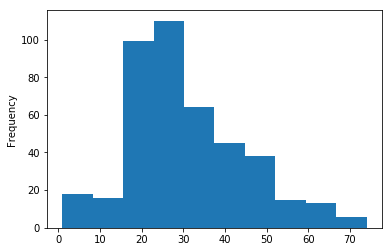

In [58]:
# Passengers not survived
age_survived = train_data[train_data['Survived'] == 0]
age_survived['Age'].plot.hist()

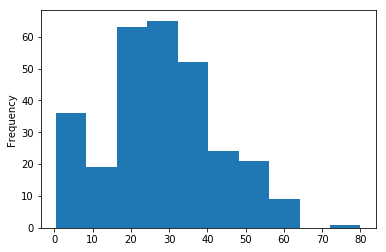

In [41]:
# Passengers survived
train_data[train_data['Survived'] == 1]['Age'].plot.hist()

> ##### *As you can see from the visualization most of the passengers survived belongs to the age group (0 to 5) and  (20 to 40)*

### 2. Sex vs Survived

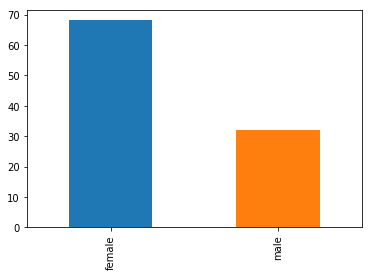

In [53]:
# Passengers survived
((train_data[train_data['Survived'] == 1]['Sex'].value_counts() / len(train_data[train_data['Survived'] == 1])) * 100).plot.bar()

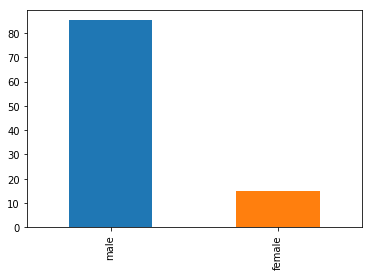

In [54]:
# Passengers not survived
((train_data[train_data['Survived'] == 0]['Sex'].value_counts() / len(train_data[train_data['Survived'] == 0])) * 100).plot.bar()

> #### It is evident from the visulization that ~68% of the survivals are female and ~85% of the passengers who died in the disaster are male

### 3. Pclass vs Survived

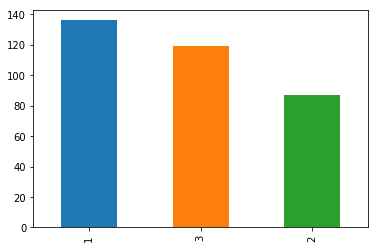

In [60]:
train_data[train_data['Survived'] == 1]['Fare'].plot.hist()

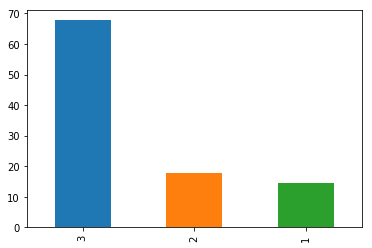

In [63]:
(train_data[train_data['Survived'] == 0]['Pclass'].value_counts() / len(train_data[train_data['Survived'] == 0]) * 100).plot.bar()

> ##### Based upon the Pclass attribute the Suvived count does not give much information, on the other hand people who travelled in 3rd class have less survival rate i.e more than 65% of 3rd class people died in the disaster

### 4. Fare vs Survived

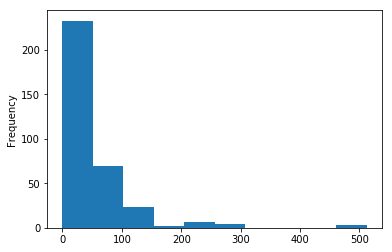

In [65]:
train_data[train_data['Survived'] == 1]['Fare'].plot.hist()

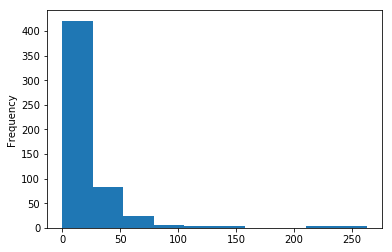

In [66]:
train_data[train_data['Survived'] == 0]['Fare'].plot.hist()

> #### The feature Fare is not a perfect classifier of the survaivals data. Fare range in between 0 to 100 have more number of survivals as well as passengers who died , the distrubution is not unifrom across entire range of the Fare. It would be better to transform this feature using log-loss function inorder to differentiate the survivals and people who died

### 5. SibSp vs Survival

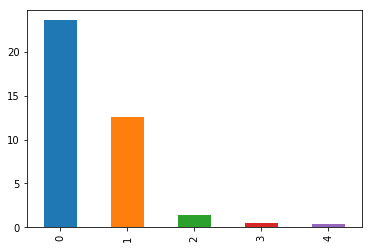

In [77]:
(train_data[train_data['Survived'] == 1]['SibSp'].value_counts() / len(train_data['SibSp']) * 100).plot.bar()

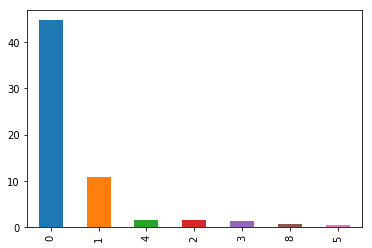

In [76]:
(train_data[train_data['Survived'] == 0]['SibSp'].value_counts() / len(train_data['SibSp']) * 100).plot.bar()

### 6. Parch vs Survival

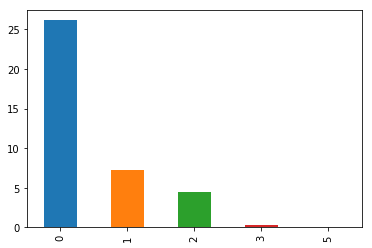

In [78]:
(train_data[train_data['Survived'] == 1]['Parch'].value_counts() / len(train_data['Parch']) * 100).plot.bar()

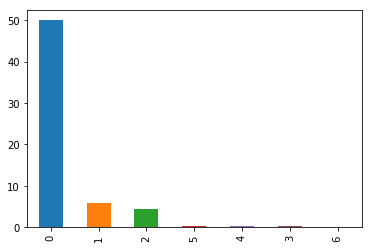

In [79]:
(train_data[train_data['Survived'] == 0]['Parch'].value_counts() / len(train_data['Parch']) * 100).plot.bar()